In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, make_moons
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    roc_curve, roc_auc_score, ConfusionMatrixDisplay
)

In [2]:
X, y = make_classification(n_samples=200, n_features=2, n_redundant=0, 
                           n_informative=2, n_clusters_per_class=1, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [3]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)
y_prob = log_reg.predict_proba(X_test)[:, 1]

Accuracy: 0.92

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.85      0.89        20
           1       0.91      0.97      0.94        30

    accuracy                           0.92        50
   macro avg       0.93      0.91      0.92        50
weighted avg       0.92      0.92      0.92        50

Confusion Matrix:
 [[17  3]
 [ 1 29]]


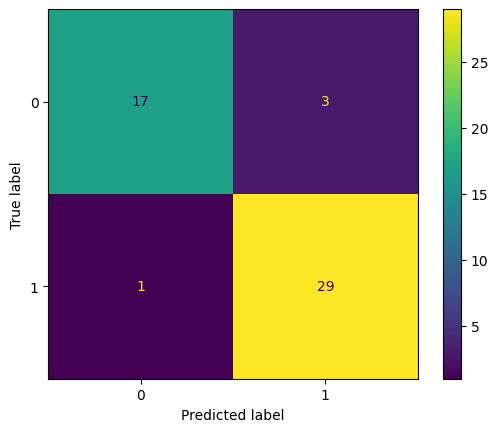

In [4]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Confusion Matrix Visualization
ConfusionMatrixDisplay.from_estimator(log_reg, X_test, y_test)
plt.show()

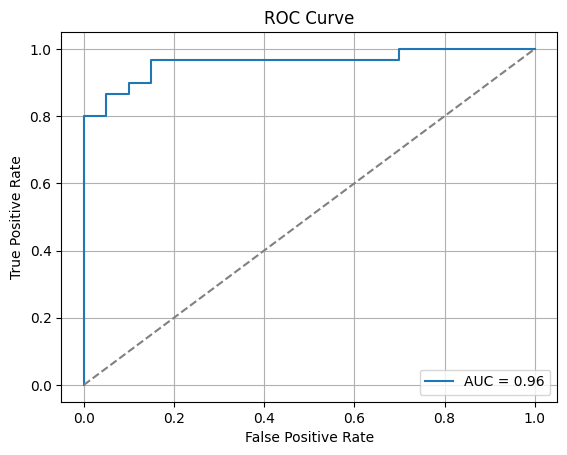

In [5]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(y_test, y_prob):.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()

In [6]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear']  # Good for small datasets
}

grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Cross-Val Accuracy:", grid.best_score_)

Best Parameters: {'C': 0.001, 'solver': 'liblinear'}
Best Cross-Val Accuracy: 0.8333333333333334


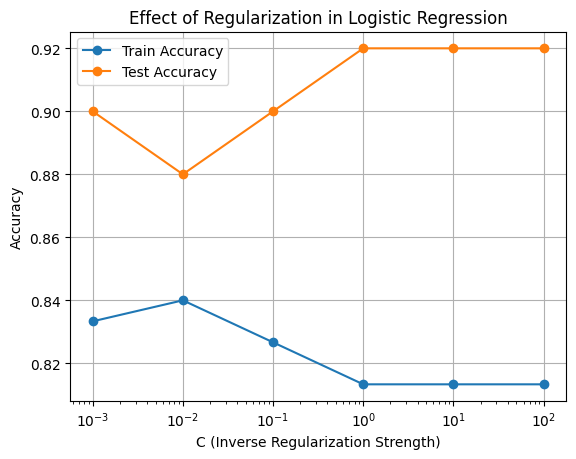

In [7]:
C_values = [0.001, 0.01, 0.1, 1, 10, 100]
train_scores = []
test_scores = []

for c in C_values:
    model = LogisticRegression(C=c, solver='liblinear')
    model.fit(X_train, y_train)
    train_scores.append(model.score(X_train, y_train))
    test_scores.append(model.score(X_test, y_test))

plt.plot(C_values, train_scores, label='Train Accuracy', marker='o')
plt.plot(C_values, test_scores, label='Test Accuracy', marker='o')
plt.xscale('log')
plt.xlabel('C (Inverse Regularization Strength)')
plt.ylabel('Accuracy')
plt.title('Effect of Regularization in Logistic Regression')
plt.legend()
plt.grid(True)
plt.show()